In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

### 1. Some preprocessing on the image

loading the image for use

In [2]:
img = Image.open(r"doland-trumph.jpeg")
# img.show()
print(img.mode)
print(img.size)

RGB
(512, 512)


here we can see that image mode is rgb so the dimensions which we are working with is 512x512x3 whivh is 3D thus we want to convert it into 2D bby grayscaling the image

In [3]:
graysclaed_img = img.convert('L')
#coverting the immage to grayscale image
print(graysclaed_img.mode)
print(graysclaed_img.size)

#converting my image into array
x = np.asarray(graysclaed_img)
# print(x)

# normalizing the image vector
x = x/255

L
(512, 512)


### 2. Hiding the message in the image

##### 2.1 Generating s

convert the message into binary  
reference - https://www.geeksforgeeks.org/python-convert-string-to-binary/#:~:text=Method%20%231%20%3A%20Using%20join(),character%20to%20form%20a%20string.

In [4]:
#the secret message
secret_msg = "IIITBangalore"

#converting into bin
bin_msg = ''.join([format(ord(i), "08b") for i in secret_msg])

print(f'The original string is {secret_msg} \nand \nThe binary string is {bin_msg}')
# print(type(bin_msg))

#now converting 0s to -1s as stated in the question

# modified_msg = bin_msg.replace('0', '-1') #doing a conversion in loop. it takes -1 as two separate characters
# print(f'modified binary message in {modified_msg}')

s = np.zeros(len(bin_msg))
# print(s)
# print(type(s))
for i in range(len(bin_msg)):
    if int(bin_msg[i]) == 0:
        s[i]=-1
    else:
        s[i] = 1
print(f'The converted array is {s}')
# print(type(s[0]))

The original string is IIITBangalore 
and 
The binary string is 01001001010010010100100101010100010000100110000101101110011001110110000101101100011011110111001001100101
The converted array is [-1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.
 -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.]


##### 2.2 Genrating Decoding message and matrix 'D'

diff between random.rand and random.randn https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python

In [15]:
#generating D
k = len(s)
n = 512*512 #size of the image
# as mentioned in question
D = np.random.randn(k,n)
# print(D)
# print(D.shape)

#normalizing
D = D / np.linalg.norm(D)
# print(D)

#pseudo inverse

D_plus = np.linalg.pinv(D)
print(D_plus)

[[ 3.29784712e-02 -7.15604213e-03  3.28017087e-02 ...  2.24997869e-03
  -1.49650231e-02  4.01242644e-02]
 [ 2.32477809e-02  4.68966090e-02 -4.98170119e-02 ...  1.56110110e-02
  -1.42108218e-02 -2.94869269e-03]
 [ 3.10151493e-02  5.71683065e-03 -6.99056982e-03 ...  2.96937972e-02
  -4.29362276e-04  5.25424827e-03]
 ...
 [-1.83547296e-02  6.51151805e-03 -3.15244816e-02 ...  2.63152117e-02
   2.71289801e-02 -1.00152640e-02]
 [ 1.94788944e-02 -3.92830033e-03 -4.39846788e-05 ... -1.28634048e-02
  -1.83433122e-02 -3.20949597e-02]
 [ 2.05508908e-02 -6.79745176e-03  1.90371042e-02 ...  2.65806574e-02
   1.11478950e-02  1.20247678e-02]]


in the above random function i observed that using random.rand will not generate desired output but random.randn will.

##### 2.3 Genrating z

In [28]:
#taking random value for aplha
#higher value of alpha, higher is the change is image noticible
alpha = 0.1
# z = D+(as - Dx) where x is image vector

#finding z
#used flatten to match dimensions 
x_new=x.flatten()
z = D_plus.dot((alpha*s - D.dot(x_new)))

print(z.shape)
print(x.shape)
print(x_new.shape)#x_new is a vector not matrix of grayscaled image

(262144,)
(512, 512)
(262144,)


##### 2.4 Encoding the message using x+z

In [29]:
mod_image = x_new+z

### 3. The Decoding Function 


In [30]:
def Decode_Message(mod_image, D, alpha):
        
    #as mentioned in question , converting to 0s and 1s
    for i in range(len(mod_image)):
        # for j in range(len(mod_image[1])):
            if mod_image[i] < 0:
                mod_image[i] = 0
            if mod_image[i] > 1:
                mod_image[i] = 1

                
    decoded_msg = np.dot(D ,mod_image)           # D(z+x) where x+z is mod_image

    #entioned in question
    bin_decoded = np.sign(decoded_msg).astype(int)        # map to sign and cast to integer
    # print(bin_decoded)

    #as while encoding we converted image entries from 0 to -1 so while decoding we revert to 0s again
    for i in range(len(bin_decoded)):            
        if bin_decoded[i] == -1:
            bin_decoded[i] = 0

    decoded_str = ''.join(list(str(x) for x in bin_decoded))                                      # form a string out of decoded binary array
    decoded_msg = ''.join(chr(int(decoded_str[i*8:i*8+8],2)) for i in range(len(decoded_str)//8))      # decode message from binary string
    # print("The decoded message is: ",decoded_msg)



    #denormalizing and reshaping the vector into matrix
    mod_image = mod_image.reshape(512, 512)
    mod_image = mod_image*255
    #fromarray takes unsigned 8 bit integer
    mod_image = mod_image.astype(np.uint8)
    # print(mod_image)

    #new image
    new_image = Image.fromarray(mod_image, 'L') 
    # new_image.show()


    return decoded_msg, new_image
    

    

### 4 Printing the modified image and result

***********  Decoded message is: IIITBangalore  *******************


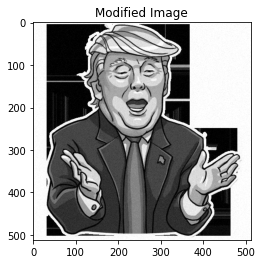

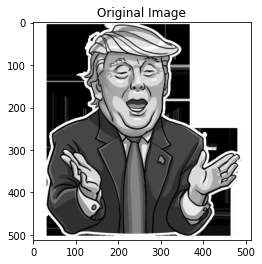

In [31]:
result, new_image = Decode_Message(mod_image, D, alpha)
print(f'***********  Decoded message is: {result}  *******************')
plt.imshow(new_image, cmap='gray', vmin=0, vmax=255)
plt.title("Modified Image")
plt.show()
plt.imshow(graysclaed_img, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.show()


